## Task B

### classification

import library

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

Creating your own dataset and label

In [2]:
def gaussian(x0, y0, x_std, y_std, n):
    X = torch.normal(mean=torch.ones((n, 2)) * torch.tensor([x0, y0]),
            std=torch.tensor([x_std, y_std]))
    return X

In [3]:
# First Gaussian distribution: x=(-1,-1), y=0
X1_xor = gaussian(-1, -1, 0.1, 0.1, 100)
y1_xor = torch.zeros(X1_xor.shape[0]).long()     # First category is 0

# Second distribution: x=(1,1), y=0
X2_xor = gaussian(1, 1, 0.1, 0.1, 100)
y2_xor = torch.zeros(X2_xor.shape[0]).long()  # First category is 0

# Third distribution: x=(-1,1), y=1
X3_xor = gaussian(-1, 1, 0.1, 0.1, 100)
y3_xor = torch.ones(X3_xor.shape[0]).long()  # Second category is 1

# Fourth distribution: x=(1,-1), y=1
X4_xor = gaussian(1, -1, 0.1, 0.1, 100)
y4_xor = torch.ones(X4_xor.shape[0]).long()  # First category is 1

In [4]:
X_xor = torch.cat((X1_xor, X2_xor, X3_xor, X4_xor), 0)
y_xor = torch.cat((y1_xor, y2_xor, y3_xor, y4_xor), 0)

Defining your simple model

In [5]:
model = torch.nn.Sequential(
    # your code
    nn.Linear(2, 30),     # 2 inputs, 30 neurons
    nn.ReLU() ,       # Non-linear activation
    nn.Linear(30, 2) ,     # 2 outputs, one for each possible category
    nn.Softmax(dim=1),     # Softmax output to get a probability distribution
)

learning_rate = 1e-2
# your code

optimizer_general = torch.optim.SGD(model.parameters(), learning_rate)  # sgd optimizer
loss_fn = torch.nn.CrossEntropyLoss()     #Cross entropy loss
# end

training the model

You have to do 6 steps in this part
* 1- predict based on x
* 2- compute loss
* 3- clear gradients for next train
* 4- backpropagation
* 5- apply gradients
* 6- Add error to error list

In [6]:
def train(x, y, model, optimizer, loss_fn, epochs):
    error_list = []
    for i in range(epochs):
         # 1- input x and predict based on x
        prediction = model(x)  
         # 2- compute loss
        loss = loss_fn(prediction, y)   
         # 3- clear gradients for next train
        optimizer.zero_grad()
         # 4- backpropagation, compute gradients
        loss.backward()  
         # 5- apply gradients
        optimizer.step() 
         # 6- add error to error list
        error_list.append(loss.detach())
        
    return error_list

In [7]:
X_xor = gaussian(-1, -1, 0.1, 0.1, 100)
y_xor = torch.zeros(X1_xor.shape[0]).long() 

error_list = train(X_xor, y_xor,
                    model, optimizer_general, loss_fn, 10000)

In [8]:
#Define a grid of points to make a prediction
n = 100
X1_pred, X2_pred = torch.meshgrid(torch.linspace(-2, 2, n),
                                  torch.linspace(-2, 2, n))
# Shape the tensor properly for prediction
X_pred = torch.stack([X1_pred.reshape(-1), X2_pred.reshape(-1)], 1)

/opt/anaconda3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1682343673238/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
# Predictions
y_pred = model(X_pred)

# Shape again for contourf
y_pred_plot = y_pred[:, 0].reshape((n, n))
# Proper format for contourf
y_pred_plot = y_pred_plot.detach()

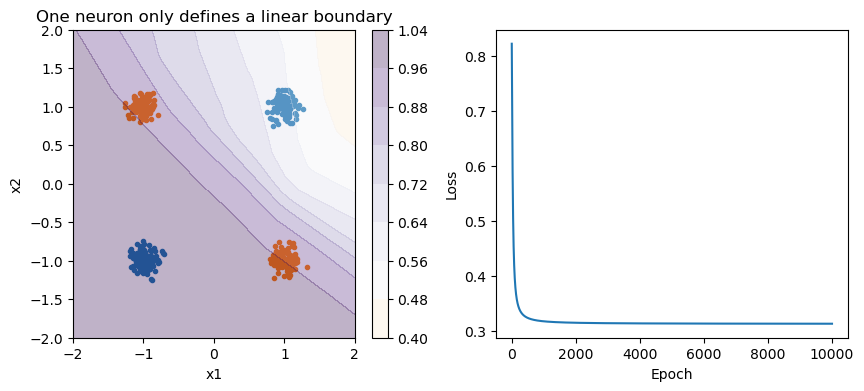

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot of first category
axs[0].scatter(torch.cat([X1_xor[:, 0], X2_xor[:, 0]]),
                torch.cat([X1_xor[:, 1], X2_xor[:, 1]]), marker='.')
# Scatter plot of second category
axs[0].scatter(torch.cat([X3_xor[:, 0], X4_xor[:, 0]]),
            torch.cat([X3_xor[:, 1], X4_xor[:, 1]]), marker='.')

im = axs[0].contourf(X1_pred, X2_pred, y_pred_plot,
                      cmap="PuOr", alpha=0.3, vmin=0, vmax=1)
axs[0].set(xlabel='x1', ylabel='x2',
            title='One neuron only defines a linear boundary')
fig.colorbar(im, ax=axs[0])

# Training error
axs[1].plot(error_list)
axs[1].set(xlabel='Epoch', ylabel='Loss')

plt.show()